In [211]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [196]:
data = datasets.load_digits()
cutter = int(data['data'].shape[0] * 0.75)
X_train, X_test, y_train, y_test = data['data'][:cutter], data['data'][cutter:], \
                                    data['target'][:cutter], data['target'][cutter:]

In [197]:
def best_euclid_distance(test, train, target):
    buffer = []
    for idx, x in enumerate(test):
        buffer.append([])
        for idy, y in enumerate(train):
            distance = ((x @ x) - 2 * (x @ y) + (y @ y))**0.5
            buffer[idx].append([distance, int(target[idy])])
        buffer[idx] = sorted(buffer[idx], key=lambda x:x[0]) 

    return np.array(buffer)[:, :1, 1]

In [198]:
predict = best_euclid_distance(X_test, X_train, y_train)
1 - float(sum(predict == y_test.reshape(y_test.shape[0], 1))/ predict.shape[0])

0.0377777777777778

0.9622222222222222


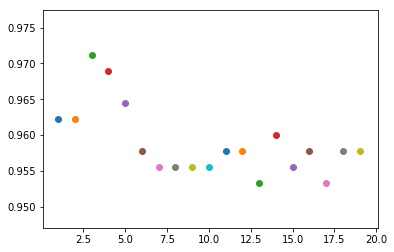

In [214]:
neib = KNeighborsClassifier(metric='euclidean', n_neighbors=1)

neib.fit(X_train, y_train)
print(accuracy_score(neib.predict(X_test), y_test))


for i in range(1, 20, 1):
    neib = KNeighborsClassifier(metric='euclidean', n_neighbors=i)
    neib.fit(X_train, y_train)
    
    plt.scatter(i, accuracy_score(neib.predict(X_test), y_test))

In [200]:
float(sum(predict == y_test.reshape(y_test.shape[0], 1))/ predict.shape[0])

0.9622222222222222

In [202]:
forest = RandomForestClassifier(n_estimators=1000)

forest.fit(X_train, y_train)

1 - accuracy_score(forest.predict(X_test), y_test)

0.06666666666666665